In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('data/train.csv')
df['id'] = pd.to_datetime(df['id'])

In [30]:
df.head()

,id,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25
0,2020-01-01 00:00:00,42.9,0.718,15.7,73.1,64.4
1,2020-01-01 01:00:00,33.6,0.587,10.1,74.8,66.0
2,2020-01-01 02:00:00,29.3,NaN,5.1,51.0,44.9
3,2020-01-01 03:00:00,30.5,0.246,7.2,27.7,25.1
4,2020-01-01 04:00:00,29.3,0.204,8.3,15.3,13.6


In [31]:
df.isna().sum()

id                 0
valeur_NO2      3297
valeur_CO      12529
valeur_O3        693
valeur_PM10     7167
valeur_PM25     1791
dtype: int64

In [3]:
features = ['valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10',
       'valeur_PM25']

In [42]:
print(df['id'].min())
print(df['id'].max())

2020-01-01 00:00:00
2024-09-03 22:00:00


# Visualize the data

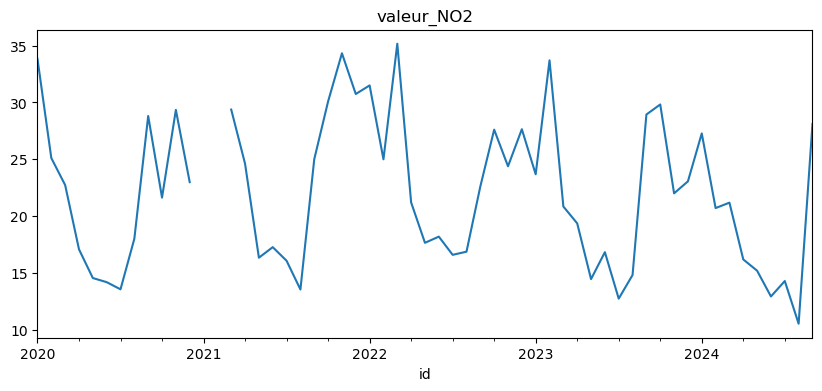

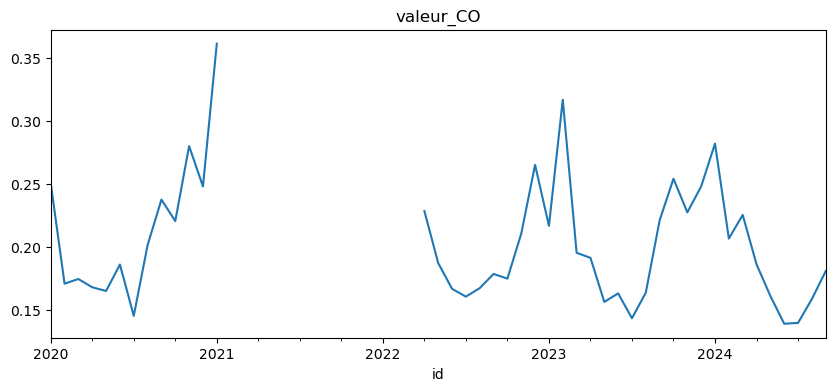

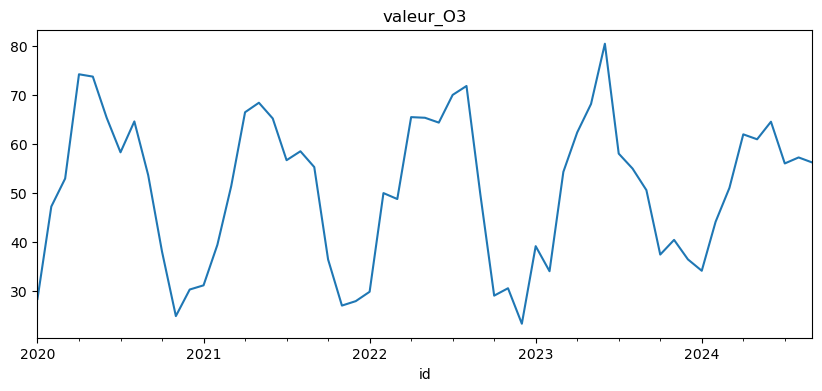

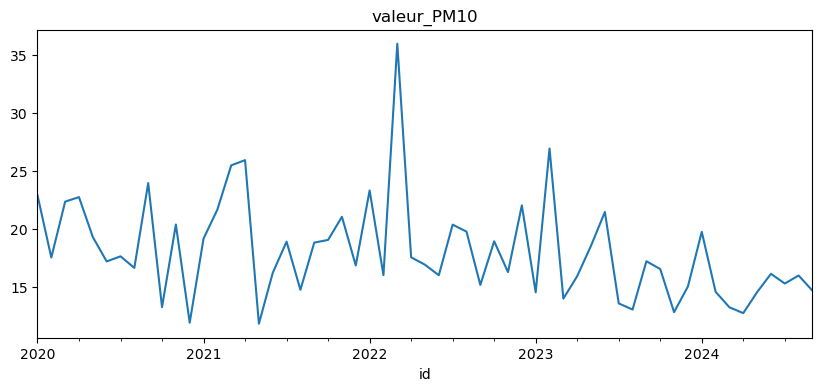

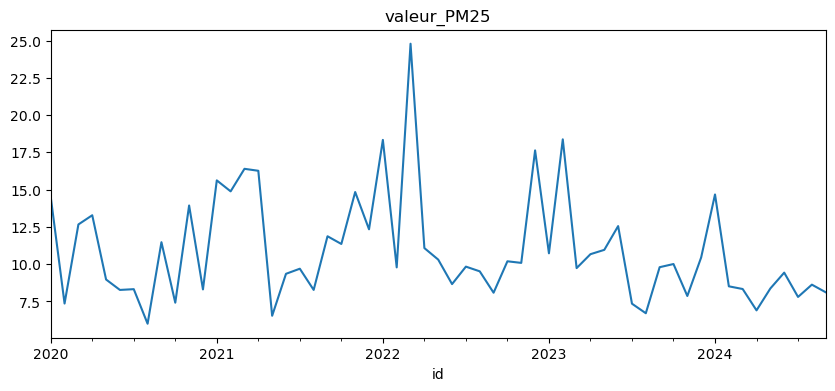

In [34]:
weekly_avg = df.resample('ME', on='id').mean()
for col in weekly_avg.columns:
    plt.figure(figsize=(10, 4))
    weekly_avg[col].plot(title=col)
    plt.show()

Clear winter = more pollution

Let's look at weekly and daily trends

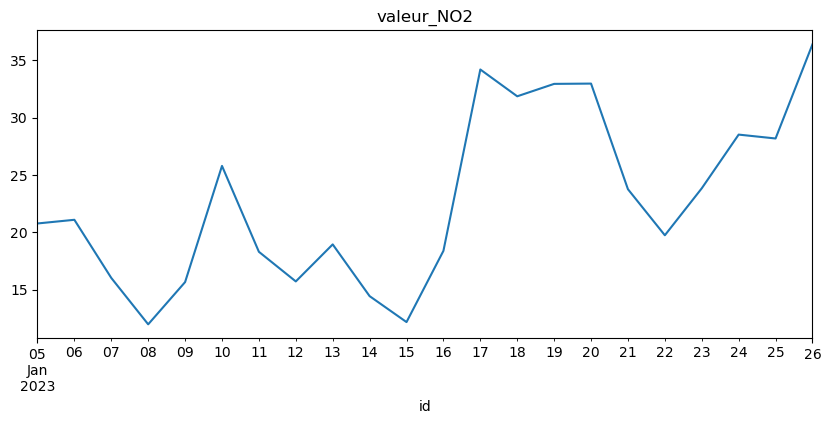

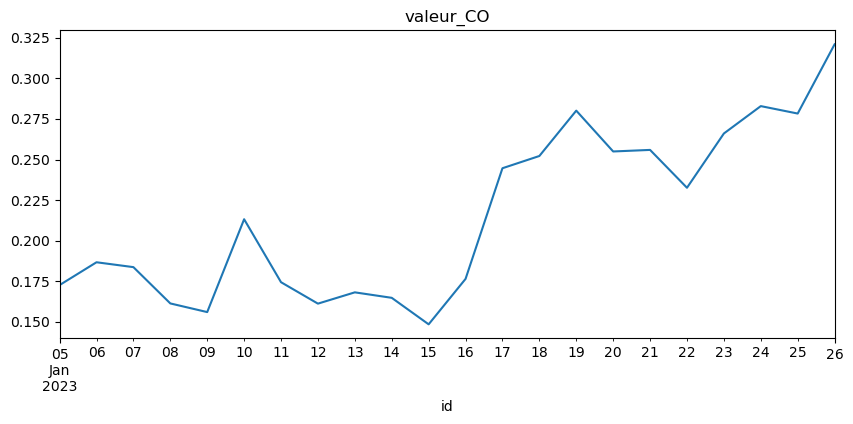

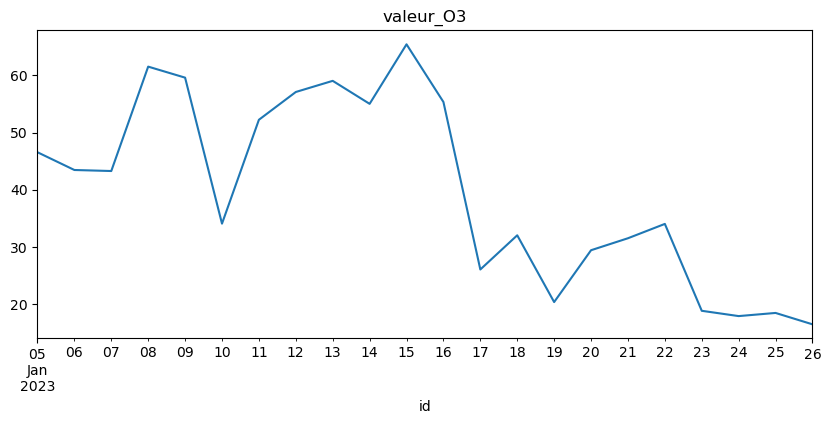

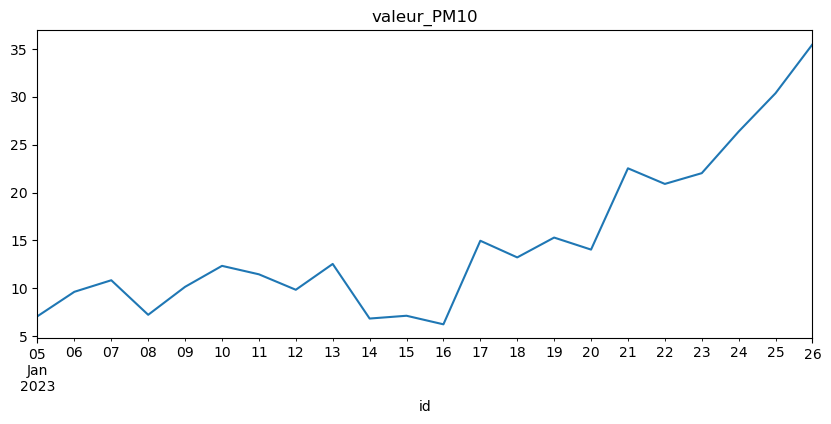

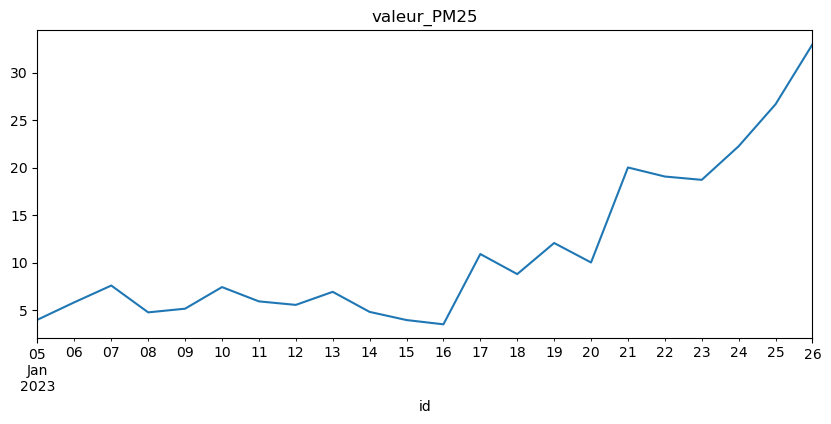

In [35]:
filter = (df['id'] >= '2023-01-05') & (df['id'] <= '2023-01-26')
daily_avg = df[filter].resample('D', on='id').mean()
for col in daily_avg.columns:
    plt.figure(figsize=(10, 4))
    daily_avg[col].plot(title=col)
    plt.show()

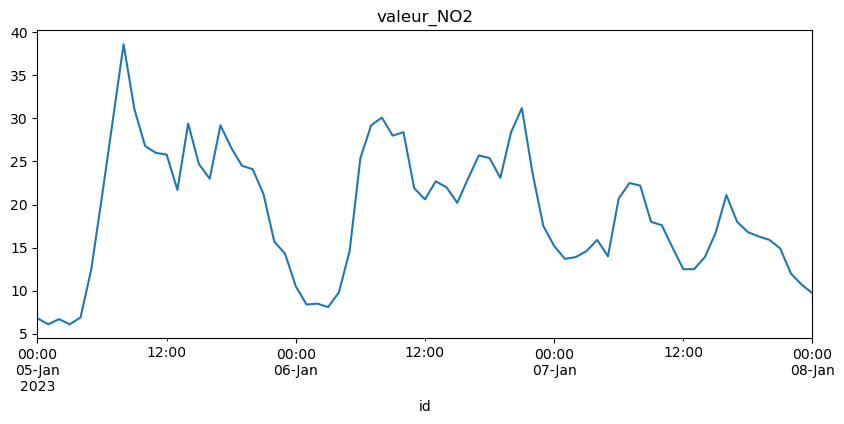

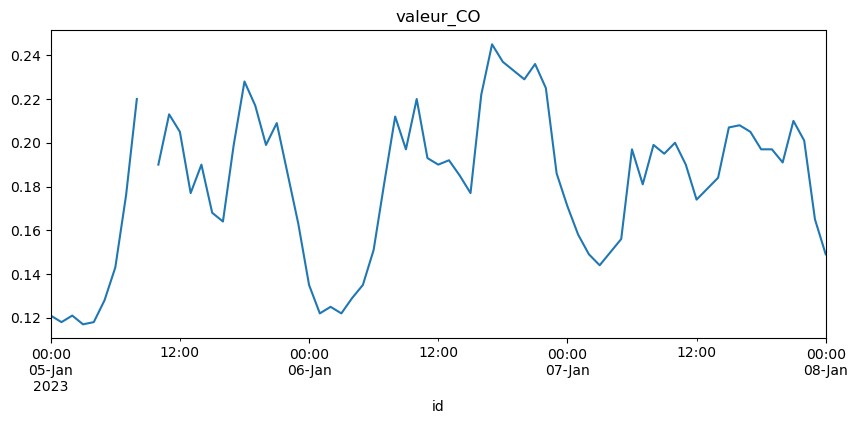

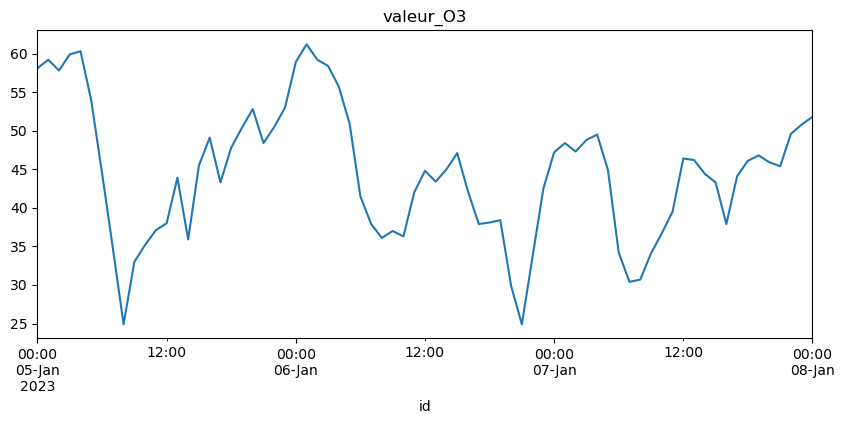

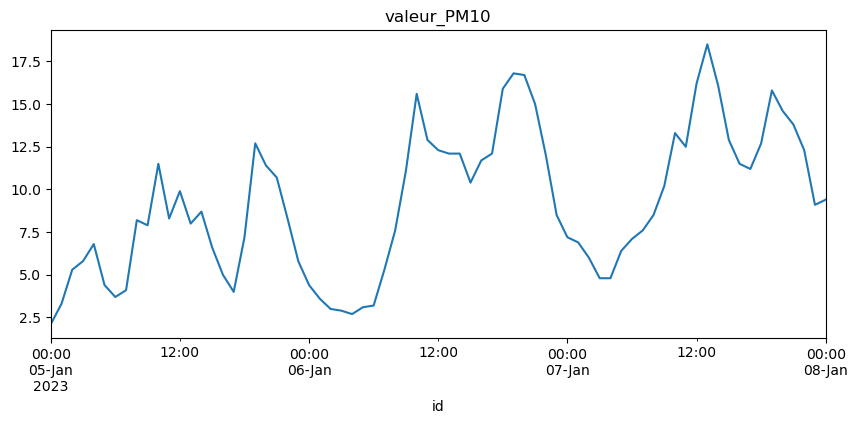

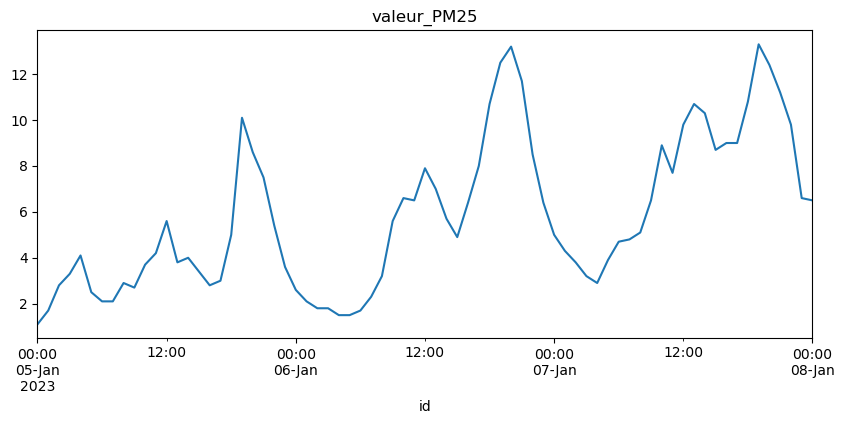

In [36]:
filter = (df['id'] >= '2023-01-05') & (df['id'] <= '2023-01-08')
daily_avg = df[filter].resample('h', on='id').mean()
for col in daily_avg.columns:
    plt.figure(figsize=(10, 4))
    daily_avg[col].plot(title=col)
    plt.show()

Decrease at night and at the middle of the day, probably due to traffic

No clear weekly patterns

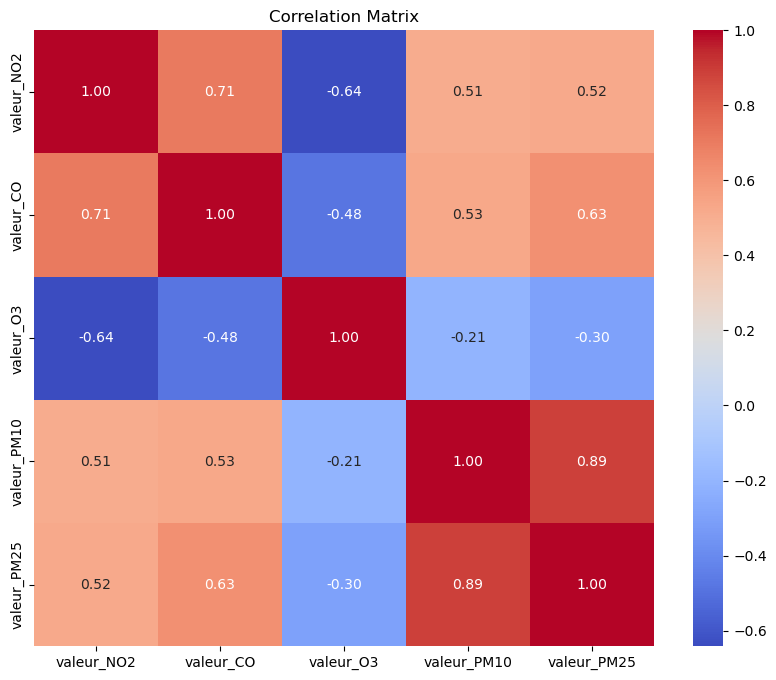

In [37]:
# Calculate the correlation matrix
corr_matrix = df[features].corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# Weather data

### Do not rerun

In [116]:
df_23 = pd.read_csv('external_data/weather_archives/H_75_23-24.csv', sep=';')
df_20 = pd.read_csv('external_data/weather_archives/H_75_20-22.csv', sep=';')
df_23_clean = df_23[df_23["NOM_USUEL"] == "PARIS-MONTSOURIS"]
df_20_clean = df_20[df_20["NOM_USUEL"] == "PARIS-MONTSOURIS"]
df_weather = pd.concat([df_20_clean, df_23_clean], axis=0, ignore_index=True)

In [117]:
useful_cols = ["AAAAMMJJHH", "RR1", "FF", "T", "U", "PSTAT", "VV", "GLO2"]
col_names = ["date", "precipitation", "wind_speed", "temperature", "humidity", "pressure", "visibility", "global_solar_radiation"]

In [118]:
df_temp = df_weather[useful_cols]
df_temp.columns = col_names
df_temp.to_csv('external_data/weather_clean.csv', index=False)

In [120]:
df_temp

,date,precipitation,wind_speed,temperature,humidity,pressure,visibility,global_solar_radiation
0,2020010100,0.0,1.5,0.8,94.0,1022.5,2139.0,0.0
1,2020010101,0.0,2.6,-0.7,96.0,1022.2,509.0,0.0
2,2020010102,0.0,1.9,-0.3,98.0,1022.2,779.0,0.0
3,2020010103,0.0,1.8,0.0,98.0,1021.9,377.0,0.0
4,2020010104,0.0,2.2,0.3,98.0,1021.6,1317.0,0.0
...,...,...,...,...,...,...,...,...
42311,2024102823,0.0,1.8,11.6,97.0,1017.7,7940.0,NaN
42312,2024102900,0.2,1.7,11.5,96.0,1017.6,10230.0,NaN
42313,2024102901,0.0,1.5,11.5,96.0,1017.6,7960.0,NaN
42314,2024102902,0.0,2.2,11.1,96.0,1017.5,7350.0,NaN


In [127]:
df_temp['date'] = pd.to_datetime(df_temp['date'], format='%Y%m%d%H')
df_temp.to_csv('external_data/weather_clean.csv', index=False)

### Reading

In [128]:
df_weather = pd.read_csv('external_data/weather_clean.csv', parse_dates=['date'])

In [129]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42316 entries, 0 to 42315
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    42316 non-null  datetime64[ns]
 1   precipitation           42291 non-null  float64       
 2   wind_speed              42311 non-null  float64       
 3   temperature             42316 non-null  float64       
 4   humidity                42316 non-null  float64       
 5   pressure                42316 non-null  float64       
 6   visibility              42265 non-null  float64       
 7   global_solar_radiation  42289 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 2.6 MB


In [130]:
# To merge

df_with_weather = pd.merge(df, df_weather, left_on='id', right_on='date', how='left')
df_with_weather.drop('date', axis=1, inplace=True)
df_with_weather

,id,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25,precipitation,wind_speed,temperature,humidity,pressure,visibility,global_solar_radiation
0,2020-01-01 00:00:00,42.9,0.718,15.7,73.1,64.4,0.0,1.5,0.8,94.0,1022.5,2139.0,0.0
1,2020-01-01 01:00:00,33.6,0.587,10.1,74.8,66.0,0.0,2.6,-0.7,96.0,1022.2,509.0,0.0
2,2020-01-01 02:00:00,29.3,NaN,5.1,51.0,44.9,0.0,1.9,-0.3,98.0,1022.2,779.0,0.0
3,2020-01-01 03:00:00,30.5,0.246,7.2,27.7,25.1,0.0,1.8,0.0,98.0,1021.9,377.0,0.0
4,2020-01-01 04:00:00,29.3,0.204,8.3,15.3,13.6,0.0,2.2,0.3,98.0,1021.6,1317.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40986,2024-09-03 18:00:00,NaN,0.222,55.1,12.0,5.3,0.0,1.2,20.5,62.0,1006.7,20000.0,2.0
40987,2024-09-03 19:00:00,NaN,0.245,48.2,13.4,7.0,0.0,1.7,19.6,67.0,1007.2,20000.0,3.0
40988,2024-09-03 20:00:00,NaN,0.234,44.5,12.4,7.1,0.0,2.0,18.4,72.0,1007.6,19890.0,0.0
40989,2024-09-03 21:00:00,NaN,0.225,25.9,10.6,5.4,0.0,1.4,18.2,77.0,1007.7,20000.0,0.0


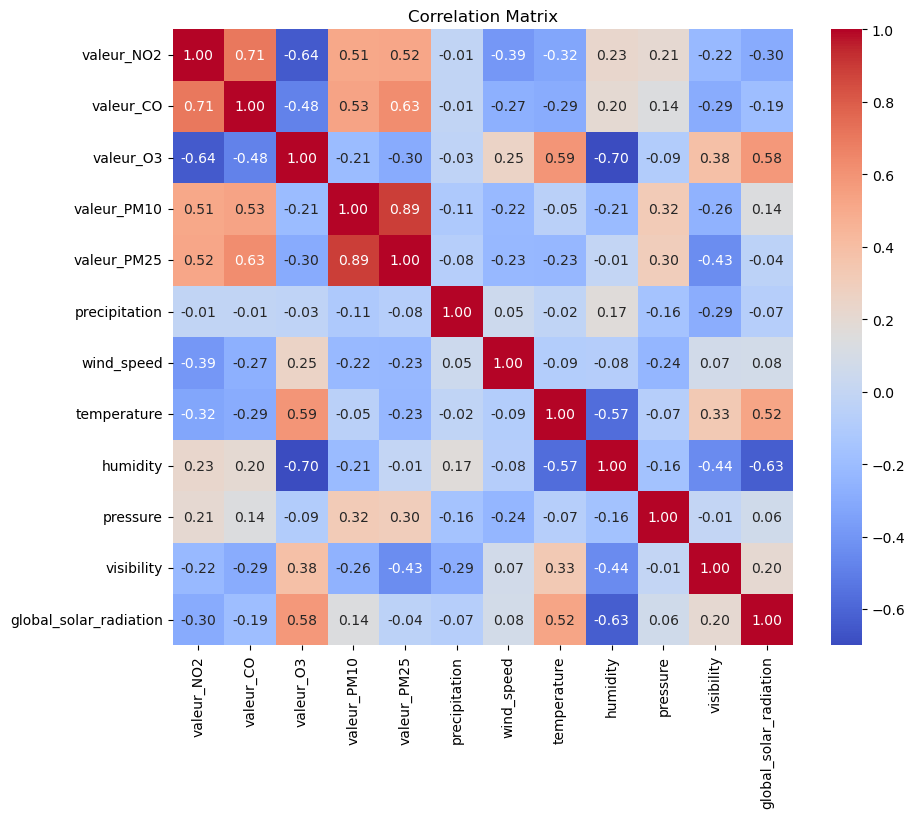

In [131]:
meteo_cols = ["precipitation", "wind_speed", "temperature", "humidity", "pressure", "visibility", "global_solar_radiation"]
corr_matrix = df_with_weather[features + meteo_cols].corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Holidays

In [21]:
import pandas as pd
df_test = pd.read_csv('external_data/test_holidays.csv')
df_train = pd.read_csv('external_data/train_holidays.csv')
pd.concat([df_train, df_test], axis=0).to_csv('external_data/holidays.csv', index=False)
